In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', return_X_y=True, version=1, parser='auto')
x = np.array(x)

In [3]:
x.shape

(70000, 784)

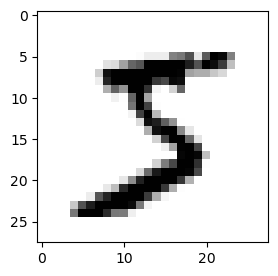

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(x[0].reshape(28, 28), cmap = mpl.cm.binary)
plt.show()

In [5]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
z = pca.fit_transform(x)

In [6]:
pca.n_components_

154

In [7]:
np.sum(pca.explained_variance_ratio_)

0.9503499702078613

In [8]:
x.shape, z.shape

((70000, 784), (70000, 154))

In [9]:
wd = pca.components_.T
wd.shape

(784, 154)

In [10]:
s2 = pca.explained_variance_
len(s2)

154

In [11]:
#Reconstruction

In [12]:
xr = pca.inverse_transform(z)

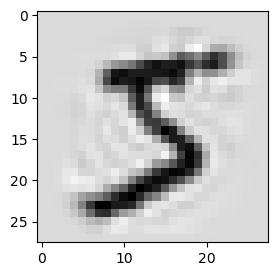

In [13]:
plt.figure(figsize=(3,3))
plt.imshow(xr[0].reshape(28,28), cmap = mpl.cm.binary)
plt.show()

In [14]:
#Randomized PCA()

In [15]:
rndPca = PCA(n_components=154, svd_solver='randomized', random_state=1)
zRnd = rndPca.fit_transform(x)

In [16]:
#Reconstruction

In [17]:
xrRnd = rndPca.inverse_transform(zRnd)

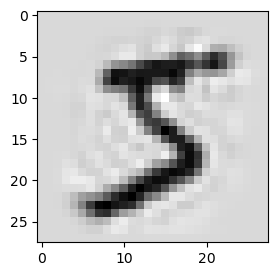

In [18]:
plt.figure(figsize=(3,3))
plt.imshow(xrRnd[0].reshape(28, 28), cmap = mpl.cm.binary)
plt.show()

In [19]:
#IncrementalPCA()

In [20]:
from sklearn.decomposition import IncrementalPCA

incPca = IncrementalPCA(n_components=154, batch_size=700)
zInc = incPca.fit_transform(x)

In [21]:
#Reconsturction

In [22]:
xrInc = incPca.inverse_transform(zInc)

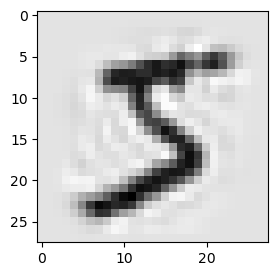

In [23]:
plt.figure(figsize=(3,3))
plt.imshow(xrInc[0].reshape(28,28), cmap=mpl.cm.binary)
plt.show()